In [3]:
import pandas as pd
from transformers import pipeline

# Leer dataset desde CSV
df = pd.read_csv("../data/archive/train.csv", encoding="latin1")

# Cargar pipeline de análisis de sentimientos (multilingüe, soporta español)
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

Device set to use cpu


In [13]:
!py -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------------------------------- ------- 10.5/12.8 MB 82.9 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 32.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\aml\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [5]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [16]:
import spacy
nlp = spacy.load("en_core_web_sm")
print("spaCy cargado: usando lematización y stopwords de spaCy.")

def preprocess_spacy(text):
    doc = nlp(str(text).lower())
    tokens = [t.lemma_ for t in doc if not t.is_stop and t.is_alpha]
    return " ".join(tokens)

df["text_preprocesado"] = df["text"].apply(preprocess_spacy)

spaCy cargado: usando lematización y stopwords de spaCy.


In [19]:
# Analizar sentimientos
results = df["text_preprocesado"].apply(lambda x: sentiment_pipeline(x)[0])

# Guardar resultados en nuevas columnas
df["sentimiento"] = results.apply(lambda r: r["label"])
df["score"] = results.apply(lambda r: r["score"])

# Mostrar tabla final
print(df[["textID", "text", "text_preprocesado" ,"sentimiento", "score"]])

# (Opcional) exportar a CSV con resultados
df.to_csv("comentarios_con_sentimiento_kaggle.csv", index=False)

           textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                       text_preprocesado sentimiento     score  
0                                             respond 

C:\Users\aml\AppData\Local\Temp\ipykernel_24632\129840792.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentimiento_simple", palette="Set2")


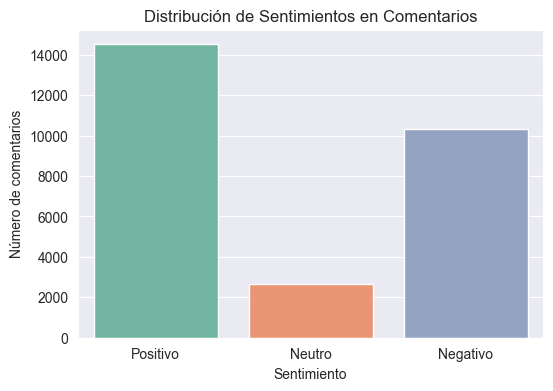

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizar etiquetas (opcional: agrupar positivo / neutro / negativo)
def normalize_label(label):
    estrellas = int(label.split()[0])  # "5 stars" → 5
    if estrellas <= 2:
        return "Negativo"
    elif estrellas == 3:
        return "Neutro"
    else:
        return "Positivo"

df["sentimiento_simple"] = df["sentimiento"].apply(normalize_label)

# --- Visualización ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sentimiento_simple", palette="Set2")
plt.title("Distribución de Sentimientos en Comentarios")
plt.xlabel("Sentimiento")
plt.ylabel("Número de comentarios")
plt.show()